## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [1]:
!pip install osmnx

In [2]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 

We are going to local path planning in Berkeley, California, between the two nodes given below. After running the code up to and including the box below, you should see the output of the shortest path between the two points. 

In [3]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

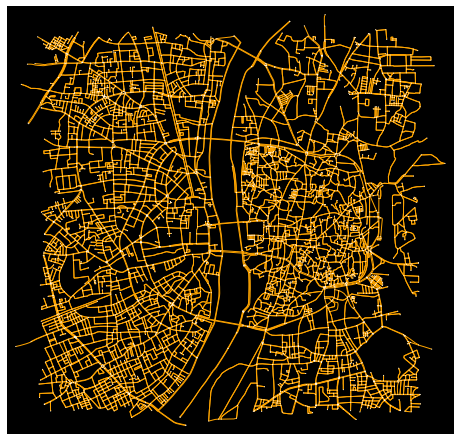

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
name, point = places[6]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [5]:
print(G.edges,G.number_of_edges())
print(G.nodes,G.number_of_nodes())

[(245711252, 1837676262, 0), (245711252, 1837676252, 0), (322863475, 1793036301, 0), (322863475, 1793048154, 0), (322863475, 429062080, 0), (322977408, 440015567, 0), (322977408, 1812355772, 0), (322977419, 1830825400, 0), (322977419, 7087440096, 0), (322977422, 440296399, 0), (322977422, 1781928249, 0), (323119106, 4483674522, 0), (323119106, 1837611664, 0), (323119106, 1837611650, 0), (323119241, 7190876738, 0), (323119241, 1835346505, 0), (323119352, 1835364732, 0), (323119352, 4488358477, 0), (323119354, 323120854, 0), (323119354, 1835274741, 0), (323120633, 3333984543, 0), (323120633, 831349818, 0), (323120633, 2401687774, 0), (323120854, 5707173159, 0), (323121465, 1836213090, 0), (323121657, 7190876737, 0), (323121657, 1786079553, 0), (323122444, 7085729706, 0), (323122444, 4486783398, 0), (323122550, 1793036301, 0), (323122550, 1837577797, 0), (323122973, 5795031230, 0), (323123060, 440015546, 0), (323123060, 1789820456, 0), (323123060, 440296453, 0), (323123063, 2631873260, 0)

Arbitrarily select the first node and last node in the Graph and find the shortest path

In [6]:
origin = 245711252
destination = 8815209372
shortest_path = nx.shortest_path(G, origin, destination)


Now visualize using plot_graph_route

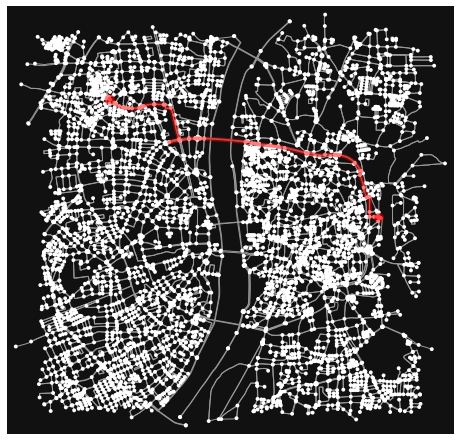

In [7]:
fig, ax = ox.plot_graph_route(G,shortest_path)

In [8]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [9]:
tree = KDTree(nodes[['y', 'x']], metric="euclidean")

start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


Visualize the shortest path and graph

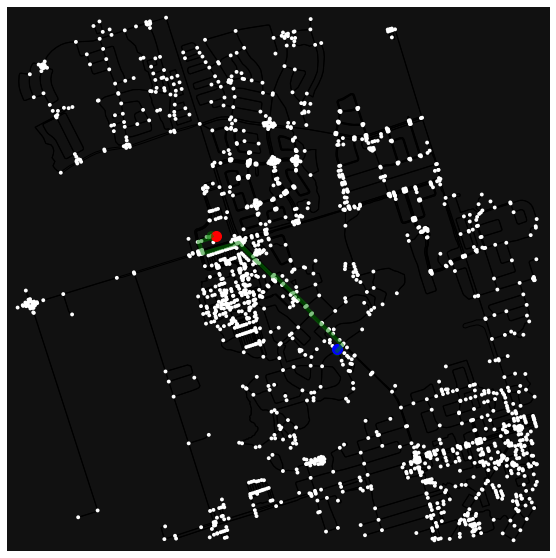

In [10]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)

Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 

In [11]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

# oshawa = (43.945403, -78.892466)
bangalore = places[4][1]
iisc = (13.02206874943877, 77.5672066707613)
# print(bangalore)
G = ox.graph_from_point(iisc, dist=2000)
start = ox.geocode('New Hostel Complex - Block 2, Arjuna Marg, Aramane Nagara Ward, West Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560012, India')
end = ox.geocode('Main Building, Kadamba Path, Sadhashivanagar, Aramane Nagara Ward, West Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560012, India')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
251361753,13.006410,77.571172,4,NaN,POINT (77.57117 13.00641)
251361754,13.008491,77.571149,4,traffic_signals,POINT (77.57115 13.00849)
251361755,13.009351,77.571127,3,NaN,POINT (77.57113 13.00935)
251361763,13.018093,77.558886,3,NaN,POINT (77.55889 13.01809)
251361774,13.019050,77.553303,3,NaN,POINT (77.55330 13.01905)


In [12]:
tree = KDTree(nodes[['y', 'x']], metric="euclidean")

start_idx = tree.query([start], k=1, return_distance=False)[0]
end_idx = tree.query([end], k=1, return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


In [13]:
print(start)
print(end)

(13.019020900000001, 77.56313366948336)
(13.01693565, 77.56706269873177)


Visualize the shortest path and graph

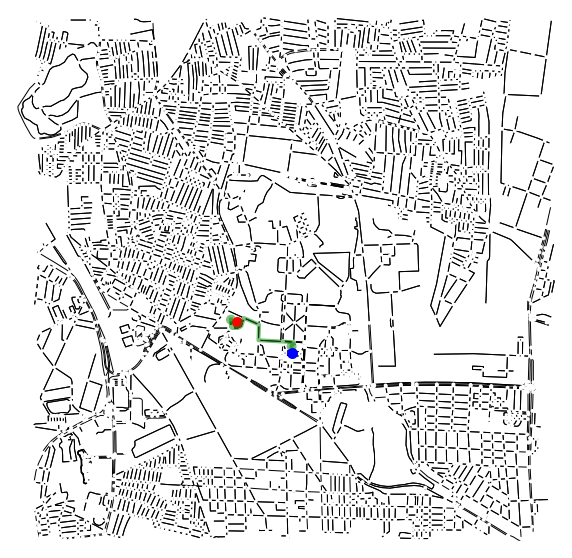

In [14]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', bgcolor='white',route_color='green')
# ox.plot_figure_ground(G, figsize=(10,10))
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)